<a href="https://colab.research.google.com/github/ScarlettQiu/OCR_for_Bank_Statement/blob/main/FSRCNN_PyTesseract_cc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (3,972 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.4 MB/s eta 0:00:00


In [3]:
import cv2
from cv2 import dnn_superres
import pytesseract
import matplotlib.pyplot as plt

In [4]:
#check the version of cv2, it should be higher than 4.3
print(cv2.__version__)

4.7.0


In [5]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

Cloning into 'OCR_for_Bank_Statement'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 76 (delta 22), reused 27 (delta 2), pack-reused 0
Unpacking objects: 100% (76/76), 11.01 MiB | 6.26 MiB/s, done.


In [6]:
def up_resolution(img_path, model_path):
  # Create an SR object
  sr = dnn_superres.DnnSuperResImpl_create()
  # Read image
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
  # Read the desired model 
  sr.readModel(model_path)
  # Set the desired model and scale to get correct pre- and post-processing
  sr.setModel("edsr", 3)
  # Upscale the image
  result = sr.upsample(image)
  # Save the image
  cv2.imwrite("./upscaled.png", result)

In [7]:
model_path = "OCR_for_Bank_Statement/FSRCNN_x2.pb"
img_path = "OCR_for_Bank_Statement/Dataset2/cc2.png"

In [8]:
up_resolution(img_path, model_path)

In [9]:
#convert image to string
img_cc2 = cv2.imread('upscaled.png')

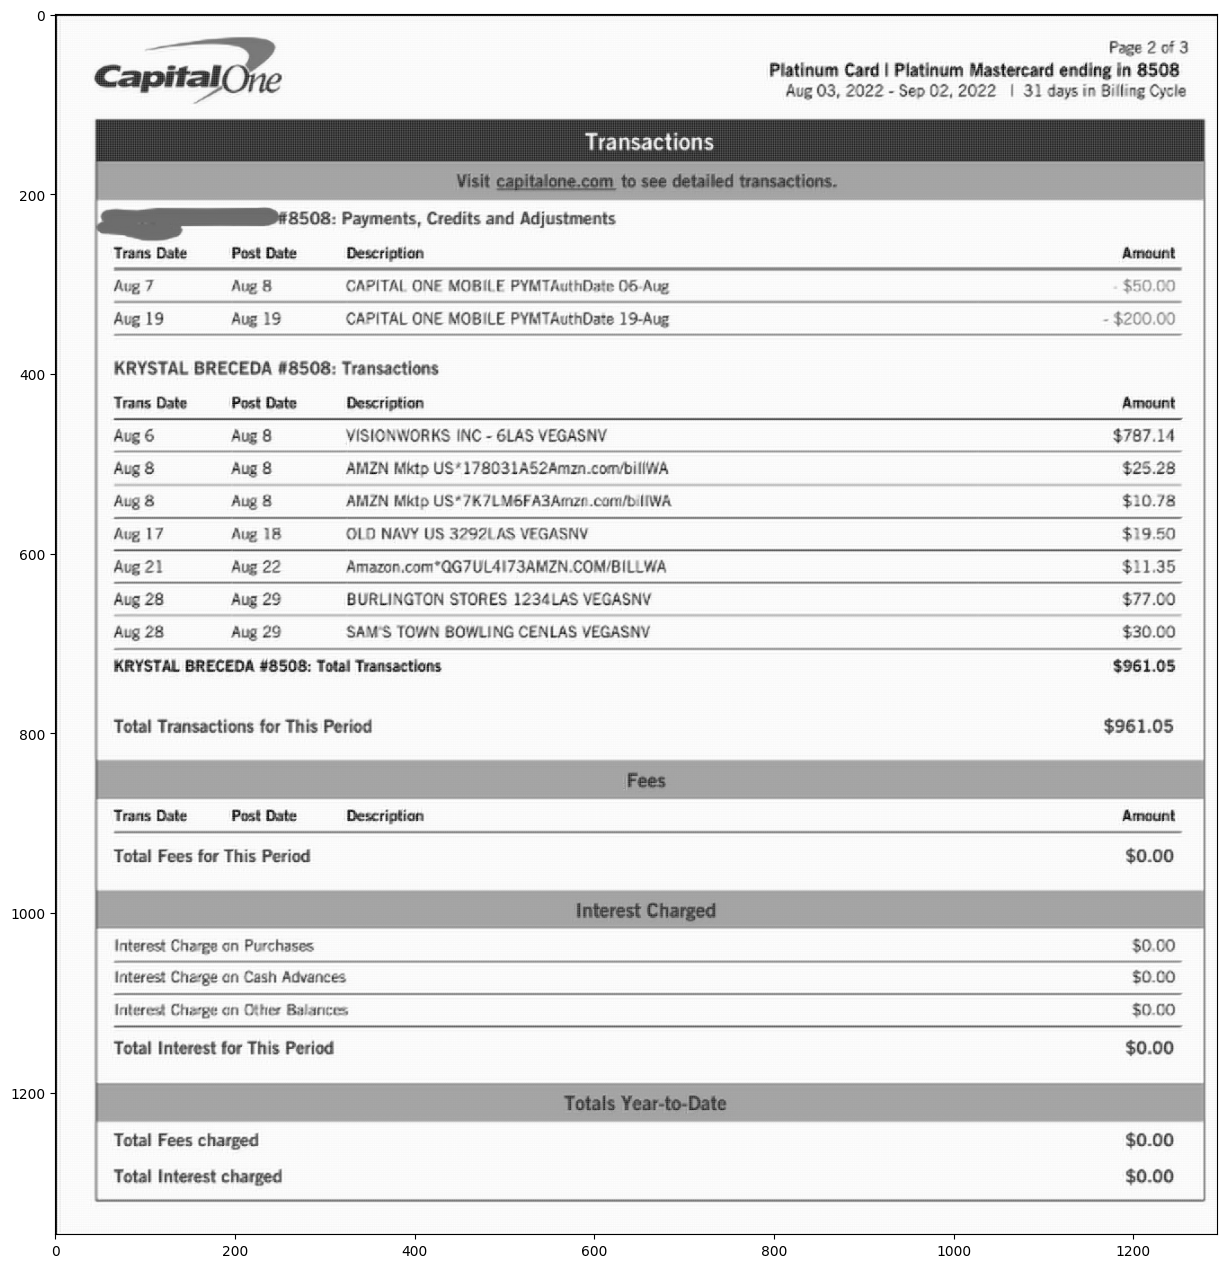

In [10]:
fig, ax = plt.subplots(figsize=(15,20))
plt.imshow(img_cc2)

In [11]:
#Extract the text using pytesseract
cc2_text = pytesseract.image_to_string(img_cc2)

In [12]:
print(cc2_text)

 

 

Page 2 of 3
Platinum Card | Platinum Mastercard ending in 8508
Aug 03, 2022 - Sep 02, 2022 | 31 days in Billing Cycle

     
    
   
  
    
  
  
  
   
  
   
    
   
  
   
  
  
   
   
  

‘8508: Payments, Credits and Adjustments
‘Trans Date Post Date Descrigtion Amount
Aug 7 Aug 8 CAPITAL ONE MOBILE PYMTAuthDate 06-Aug $50.00
Aug 19 Aug 19 CAPITAL ONE MOBILE PYMTAuthDate 19-Aug - $200.00

 

KRYSTAL BRECEDA #8508: Transactions

 

 

 

 

 

 

 

 

Trans Date Post Date Description Amount
Aug 6 Aug 8 VISIONWORKS INC - GLAS VEGASNV $787.14
Aug & Aug 8 AMZN MMktp US*178031AS2Amzn-compbillWA $25.28
Aug & Aug 8 AIAZN Biktp US*7K7LM6FA3Amzn.cam/billWA $10.78
Aug 17 Aug 18 OLO NAVY US 3292L AS VEGASNY $19.50
Aug 21 Aug 22 Amazon.com*QG7UL4I73AMZN.COM/BILLWA, $11.35
Aug 28 Aug 29 BURLINGTON STORES 1234LAS VEGASNV $77.00
Aug 28 Aug 29 SAM'S TOWN BOWLING CENLAS VEGASNY $30.00
KRYSTAL BRECEDA #8508: Total Transactions $961.05
Total Transactions for This Period $961.05

   
 

‘Tr

In [13]:
#Check the levenshtein distance
from Levenshtein import distance

ground_value = ''' 

 

Page 2 of 3
Platinum Card | Platinum Mastercard ending in 8508
Aug 03, 2022 - Sep 02, 2022 | 31 days in Billing Cycle

     
    
   
  
    
  
  
  
   
  
   
    
   
  
   
  
  
   
   
  

#8508: Payments, Credits and Adjustments
Trans Date Post Date Descrigtion Amount
Aug 7 Aug 8 CAPITAL ONE MOBILE PYMTAuthDate 06-Aug -$50.00
Aug 19 Aug 19 CAPITAL ONE MOBILE PYMTAuthDate 19-Aug - $200.00

 

KRYSTAL BRECEDA #8508: Transactions

 

 

 

 

 

 

 

 

Trans Date Post Date Description Amount
Aug 6 Aug 8 VISIONWORKS INC - GLAS VEGASNV $787.14
Aug & Aug 8 AMZN MMktp US*178031AS2Amzn-compbillWA $25.28
Aug & Aug 8 AIAZN Biktp US*7K7LM6FA3Amzn.cam/billWA $10.78
Aug 17 Aug 18 OLO NAVY US 3292L AS VEGASNY $19.50
Aug 21 Aug 22 Amazon.com*QG7UL4I73AMZN.COM/BILLWA, $11.35
Aug 28 Aug 29 BURLINGTON STORES 1234LAS VEGASNV $77.00
Aug 28 Aug 29 SAM'S TOWN BOWLING CENLAS VEGASNY $30.00
KRYSTAL BRECEDA #8508: Total Transactions $961.05
Total Transactions for This Period $961.05

   
 

Trans Date Post Date

 

Description

Total Fees for This Period

Interest Charge on Purchases $0.00
Interest Charge an Cash Advances $0.00

 

 

Interest Charge on Other Balances $0.00

 

Total Interest for This Period $0.00

Total Fees charged $0.00
Total Interest charged $0.00

  

 
'''


print(distance(ground_value, cc2_text))

31


In [14]:
#check the accuracy using sequence matcher
from difflib import SequenceMatcher

sm = SequenceMatcher(None, cc2_text, ground_value)
true_positive_char_num = 0
for tag, i1, i2, j1, j2 in sm.get_opcodes():
    if tag== 'equal':
        true_positive_char_num += (j2 - j1)
    else:
        pass

print(f'accuracy = {true_positive_char_num/len(ground_value)}')

accuracy = 0.972027972027972
